# MINERR.AI
## TRACING THE UNDISCOVERED

The dataset has been downloaded & extracted from the Bhukosh Portal itself as mentioned in the Problem Statement.

You can download the dataset from the Datasets Folder.

                                                                                                           by Code O Holics

## Importing The Neccessary Libraries

In [1]:
# IMPORTING PANDAS
import pandas as pd

# IMPORTING NUMPY
import numpy as np

# IMPORTING MATPLOTLIB
import matplotlib.pyplot as plt

# IMPORTING SEABORN
import seaborn as sns

# CREATING INLINE FIGURES
%matplotlib inline

In [ ]:
# Cleaning and Preprocessing of the data has been done!

In [2]:
data = pd.read_csv('Datasets/Pre-Processed-Data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   METALLOGEN         3318 non-null   object 
 1   LOCALITY           3318 non-null   object 
 2   STATE              3318 non-null   object 
 3   TOPOSHEET          3318 non-null   object 
 4   MINERAL_OR         3318 non-null   object 
 5   HOSTROCK_TYPE1     3296 non-null   object 
 6   HOSTROCK_TYPE2     3296 non-null   object 
 7   HOSTROCK_TYPE3     3318 non-null   object 
 8   HOSTROCK_TYPE4     3318 non-null   object 
 9   MORPH-STRATABOUND  3318 non-null   int64  
 10  MORPH-SEDIMENTARY  3318 non-null   int64  
 11  MORPH-BEDDED       3318 non-null   int64  
 12  MORPH-SHEAR        3318 non-null   int64  
 13  MORPH-CONCORDANT   3318 non-null   int64  
 14  MORPH-DISCORDANT   3318 non-null   int64  
 15  MORPH-LENSOID      3318 non-null   int64  
 16  MORPH-RESIDUAL     3318 

In [4]:
data.head()

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,EASTERN GHAT BELT,BAGHDAPA,ORISSA,73 C,Be,PEGMATITE IN GRANULITE,-,-,-,0,...,0,0,1,0,0,0,0,0,0,38146.00
1,SARGIPALLI BELT,SARGIPALLI,ORISSA,64 N,Pb,GARNETIFEROUS MICA SCHIST,-,-,-,1,...,0,0,0,0,1,0,0,0,0,2.63
2,RORO-JOJOHATU BELT,"RORO,JOJOHATU",JHARKHAND,73,Cr,ULTRAMAFIC SUIT,-,-,-,0,...,0,0,0,0,0,1,0,0,0,123283.00
3,BONAI-NOAMUNDI-JAMDA BELT,ITAR-BALIJODI,ORISSA,73,Fe-Hematite,BHQ,SHALE INTERLAYERED WITH LAVA,-,-,0,...,0,0,0,0,0,0,0,1,0,3.00
4,BONAI-NOAMUNDI-JAMDA BELT,MERALGORA,JHARKHAND,73,Fe-Hematite,BHQ,SHALE,BHQ,-,0,...,0,0,0,0,0,0,0,1,0,1.50


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
LE = LabelEncoder()
data['METALLOGEN'] = LE.fit_transform(data['METALLOGEN'])
data['LOCALITY'] = LE.fit_transform(data['LOCALITY'])
data['STATE'] =  LE.fit_transform(data['STATE'])
data['TOPOSHEET'] = LE.fit_transform(data['TOPOSHEET'])
data['HOSTROCK_TYPE1'] = LE.fit_transform(data['HOSTROCK_TYPE1'])
data['HOSTROCK_TYPE2'] = LE.fit_transform(data['HOSTROCK_TYPE2'])
data['HOSTROCK_TYPE3'] = LE.fit_transform(data['HOSTROCK_TYPE3'])
data['HOSTROCK_TYPE4'] = LE.fit_transform(data['HOSTROCK_TYPE4'])
data['MINERAL_OR'] = LE.fit_transform(data['MINERAL_OR'])


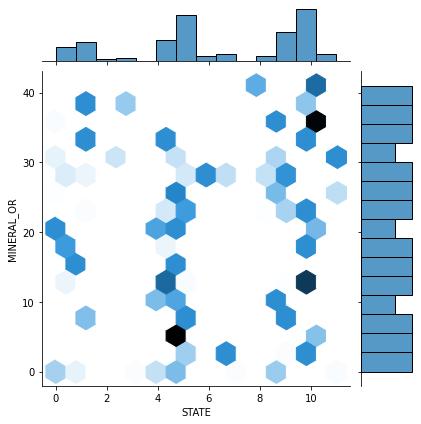

In [7]:
sns.jointplot(x="STATE",y="MINERAL_OR",data=data,kind='hex')

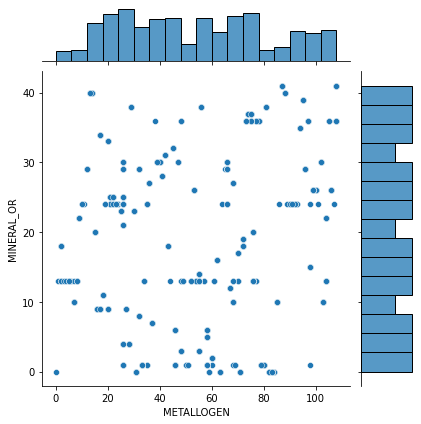

In [8]:
sns.jointplot(x="METALLOGEN",y="MINERAL_OR",data=data,kind='scatter')

In [9]:
len(data['METALLOGEN'].unique())

109

In [10]:
data.head()

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.00
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.63
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.00
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.00
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.50


In [11]:
data["MINERAL_OR"].max()

41

In [12]:
mineral_labels = {'Fe-Hematite': 24, 'Cu': 13, 'Au': 1, 'Al-Bauxite': 0, 'Pb-Zn': 36, 'Mn': 29, 'Mn-Fe': 30, 'Cr': 10, 'Fe-Ti-V': 27, 'Be-Nb-Ta': 9, 'Cu-Pb': 18, 'Cu-Zn': 23, 'Fe-Magnetite': 26, 'WO3': 40, 'Pb-Zn-Cu': 38, 'Pb-Zn-Ag': 37, 'Fe-Hematite-Mn': 25, 'Cu-Pb-Zn': 20, 'Au-W': 6, 'Au-Cu': 3, 'Pb': 35, 'Nb-Ta-Li-Sn': 34, 'Au-Mo': 5, 'Cu-Pb-Ba': 19, 'Cu-U': 12, 'Zn': 41, 'Au-Cu-Zn': 4, 'Cu-Pb-Zn-Sb-Py': 21, 'Be': 8, 'Cr-PGE': 11, 'U': 39, 'Cs': 12, 'Nb-Ta': 33, 'Cu-Ni': 17, 'Mo-U-Cu': 32, 'Cu-Co': 14, 'Cu-Mo-Au': 16, 'Au-Ag-Cu-Pb-Zn': 2, 'Ma': 28, 'Mo': 31, 'Cu-Fe-Ti-V': 15, 'Ba': 7}

In [13]:
X = data.copy()

In [14]:
X.head()

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.00
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.63
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.00
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.00
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.50


In [15]:
len(X)

3318

X also contains RESERVE_AMT

# CLASSIFICATION MODEL

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.metrics import classification_report

# ANN

In [18]:
X

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.000
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.630
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.000
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.000
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,87,280,8,18,41,33,39,43,13,1,...,0,0,0,0,0,0,0,0,0,3.987
3314,87,280,8,18,41,33,39,43,13,1,...,0,0,0,0,0,0,0,0,0,3.987
3315,87,280,8,18,41,33,39,43,13,1,...,0,0,0,0,0,0,0,0,0,3.987
3316,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680


In [19]:
X["MINERAL_OR"].nunique()

42

In [20]:
# Output LAyers =42
# Multiclass Classification - Softmax activation function

In [21]:
x = X.drop(["MINERAL_OR","RESERVE_AMT"],axis=1).values
y = X["MINERAL_OR"].values

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
x_train = scaler.fit_transform(x_train)

In [26]:
x_test = scaler.transform(x_test)

In [27]:
import tensorflow as tf
input_shape = x_train.shape

In [28]:
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten)
model.add(tf.keras.layers.Dense(units=200,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=42,activation='softmax'))

In [29]:
model.build(input_shape)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (2488, 200)               4600      
                                                                 
 dropout (Dropout)           (2488, 200)               0         
                                                                 
 dense_1 (Dense)             (2488, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (2488, 100)               0         
                                                                 
 dense_2 (Dense)             (2488, 42)                4242      
                                                                 
Total params: 28,942
Trainable params: 28,942
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor = 'val_accuracy', mode='max',verbose=1,patience=50)

In [34]:
model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/1000
78/78 [==============================] - 2s 3ms/step - loss: 3.7378 - accuracy: 0.0265 - val_loss: 3.7103 - val_accuracy: 0.0578
Epoch 2/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.7176 - accuracy: 0.0281 - val_loss: 3.6874 - val_accuracy: 0.0783
Epoch 3/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6921 - accuracy: 0.0330 - val_loss: 3.6651 - val_accuracy: 0.1205
Epoch 4/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6704 - accuracy: 0.0547 - val_loss: 3.6412 - val_accuracy: 0.1096
Epoch 5/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6504 - accuracy: 0.0591 - val_loss: 3.6147 - val_accuracy: 0.1542
Epoch 6/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6321 - accuracy: 0.0671 - val_loss: 3.5877 - val_accuracy: 0.1723
Epoch 7/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6002 - accuracy: 0.0800 - val_loss: 3.5582 - val_accuracy: 0.2193
Epoch 

78/78 [==============================] - 0s 3ms/step - loss: 1.4565 - accuracy: 0.5527 - val_loss: 1.0840 - val_accuracy: 0.7711
Epoch 59/1000
78/78 [==============================] - 0s 2ms/step - loss: 1.4387 - accuracy: 0.5756 - val_loss: 1.0653 - val_accuracy: 0.7795
Epoch 60/1000
78/78 [==============================] - 0s 2ms/step - loss: 1.4220 - accuracy: 0.5848 - val_loss: 1.0454 - val_accuracy: 0.7771
Epoch 61/1000
78/78 [==============================] - 0s 2ms/step - loss: 1.4092 - accuracy: 0.5832 - val_loss: 1.0279 - val_accuracy: 0.7699
Epoch 62/1000
78/78 [==============================] - 0s 2ms/step - loss: 1.3778 - accuracy: 0.5836 - val_loss: 1.0076 - val_accuracy: 0.7675
Epoch 63/1000
78/78 [==============================] - 0s 2ms/step - loss: 1.3680 - accuracy: 0.5824 - val_loss: 0.9914 - val_accuracy: 0.7759
Epoch 64/1000
78/78 [==============================] - 0s 2ms/step - loss: 1.3508 - accuracy: 0.6101 - val_loss: 0.9722 - val_accuracy: 0.7723
Epoch 65/1000

78/78 [==============================] - 0s 2ms/step - loss: 0.8410 - accuracy: 0.7331 - val_loss: 0.5354 - val_accuracy: 0.8494
Epoch 116/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8338 - accuracy: 0.7552 - val_loss: 0.5306 - val_accuracy: 0.8361
Epoch 117/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8152 - accuracy: 0.7657 - val_loss: 0.5236 - val_accuracy: 0.8398
Epoch 118/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8195 - accuracy: 0.7456 - val_loss: 0.5234 - val_accuracy: 0.8470
Epoch 119/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.7991 - accuracy: 0.7649 - val_loss: 0.5203 - val_accuracy: 0.8482
Epoch 120/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8111 - accuracy: 0.7552 - val_loss: 0.5153 - val_accuracy: 0.8470
Epoch 121/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.7967 - accuracy: 0.7621 - val_loss: 0.5105 - val_accuracy: 0.8566
Epoch 1

Epoch 172/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.8219 - val_loss: 0.3815 - val_accuracy: 0.8771
Epoch 173/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.8163 - val_loss: 0.3760 - val_accuracy: 0.8867
Epoch 174/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.8143 - val_loss: 0.3779 - val_accuracy: 0.8843
Epoch 175/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.8268 - val_loss: 0.3706 - val_accuracy: 0.8843
Epoch 176/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.8191 - val_loss: 0.3715 - val_accuracy: 0.8867
Epoch 177/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.5916 - accuracy: 0.8187 - val_loss: 0.3692 - val_accuracy: 0.8964
Epoch 178/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.8199 - val_loss: 0.3675 - val_accuracy:

Epoch 229/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.8517 - val_loss: 0.3101 - val_accuracy: 0.9072
Epoch 230/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.8541 - val_loss: 0.3073 - val_accuracy: 0.9108
Epoch 231/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.8501 - val_loss: 0.3072 - val_accuracy: 0.9096
Epoch 232/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.8481 - val_loss: 0.3026 - val_accuracy: 0.9096
Epoch 233/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.8537 - val_loss: 0.3014 - val_accuracy: 0.9072
Epoch 234/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.8597 - val_loss: 0.3019 - val_accuracy: 0.9096
Epoch 235/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.8617 - val_loss: 0.3023 - val_accuracy:

Epoch 286/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8782 - val_loss: 0.2725 - val_accuracy: 0.9096
Epoch 287/1000
78/78 [==============================] - 0s 3ms/step - loss: 0.4277 - accuracy: 0.8758 - val_loss: 0.2672 - val_accuracy: 0.9157
Epoch 288/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.8770 - val_loss: 0.2640 - val_accuracy: 0.9108
Epoch 289/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8778 - val_loss: 0.2625 - val_accuracy: 0.9108
Epoch 290/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.8714 - val_loss: 0.2640 - val_accuracy: 0.9145
Epoch 291/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8742 - val_loss: 0.2621 - val_accuracy: 0.9133
Epoch 292/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8754 - val_loss: 0.2643 - val_accuracy:

Epoch 343/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8859 - val_loss: 0.2446 - val_accuracy: 0.9157
Epoch 344/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8810 - val_loss: 0.2410 - val_accuracy: 0.9157
Epoch 345/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8855 - val_loss: 0.2394 - val_accuracy: 0.9169
Epoch 346/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8875 - val_loss: 0.2395 - val_accuracy: 0.9181
Epoch 347/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.8875 - val_loss: 0.2400 - val_accuracy: 0.9181
Epoch 348/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8855 - val_loss: 0.2413 - val_accuracy: 0.9169
Epoch 349/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8786 - val_loss: 0.2399 - val_accuracy:

Epoch 400/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8959 - val_loss: 0.2267 - val_accuracy: 0.9181
Epoch 401/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8975 - val_loss: 0.2249 - val_accuracy: 0.9241
Epoch 402/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8955 - val_loss: 0.2259 - val_accuracy: 0.9181
Epoch 403/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8895 - val_loss: 0.2238 - val_accuracy: 0.9229
Epoch 404/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.9011 - val_loss: 0.2257 - val_accuracy: 0.9169
Epoch 405/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8919 - val_loss: 0.2252 - val_accuracy: 0.9193
Epoch 406/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8987 - val_loss: 0.2229 - val_accuracy:

In [35]:
model.history.history

{'loss': [3.737842082977295,
  3.717593193054199,
  3.692077159881592,
  3.6703670024871826,
  3.6504039764404297,
  3.632075786590576,
  3.600213050842285,
  3.57053542137146,
  3.544762134552002,
  3.515259265899658,
  3.4741666316986084,
  3.4297244548797607,
  3.406623601913452,
  3.35600209236145,
  3.3134565353393555,
  3.275070905685425,
  3.2084686756134033,
  3.169154405593872,
  3.113790512084961,
  3.0695717334747314,
  2.9713187217712402,
  2.9111311435699463,
  2.861290693283081,
  2.783576250076294,
  2.7380247116088867,
  2.685903549194336,
  2.6126549243927,
  2.5460431575775146,
  2.5135834217071533,
  2.431864023208618,
  2.397066116333008,
  2.335721969604492,
  2.2942419052124023,
  2.231797695159912,
  2.186070203781128,
  2.135737180709839,
  2.1072537899017334,
  2.0401971340179443,
  1.9965872764587402,
  1.9655849933624268,
  1.9415589570999146,
  1.8758058547973633,
  1.8995589017868042,
  1.849352478981018,
  1.8187065124511719,
  1.7728538513183594,
  1.7417

In [36]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

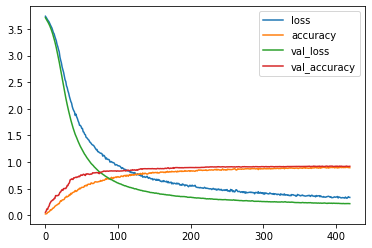

In [37]:
model_loss.plot()

In [38]:
model_loss["accuracy"].max()

0.9055466055870056

In [39]:
y_pred=np.argmax(model.predict(x_test), axis=1)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.95      0.71      0.82        28
           2       1.00      1.00      1.00        23
           3       0.95      1.00      0.98        20
           4       0.95      1.00      0.97        19
           5       1.00      1.00      1.00        20
           6       0.89      1.00      0.94        24
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00        14
           9       1.00      0.75      0.86        28
          10       0.75      1.00      0.86        15
          11       0.95      1.00      0.98        21
          12       1.00      1.00      1.00        20
          13       1.00      0.42      0.59        24
          14       0.94      1.00      0.97        17
          15       1.00      1.00      1.00        21
          16       0.92      1.00      0.96        12
          17       0.96    

In [42]:
#from keras.models import load_model
#model.save('Saved Models/classify-minerals.h5')

# REGRESSION MODEL

In [43]:
X

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.000
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.630
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.000
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.000
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,87,280,8,18,41,33,39,43,13,1,...,0,0,0,0,0,0,0,0,0,3.987
3314,87,280,8,18,41,33,39,43,13,1,...,0,0,0,0,0,0,0,0,0,3.987
3315,87,280,8,18,41,33,39,43,13,1,...,0,0,0,0,0,0,0,0,0,3.987
3316,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680


In [44]:
X.corr()["RESERVE_AMT"].sort_values()

STATE               -0.241892
HOSTROCK_TYPE2      -0.133362
MORPH-CONCORDANT    -0.080162
HOSTROCK_TYPE3      -0.075451
MINERAL_OR          -0.063876
MORPH-SHEAR         -0.059961
MORPH-OTHER         -0.059448
MORPH-RESIDUAL      -0.055847
MORPH-BEDDED        -0.055438
MORPH-SEDIMENTARY   -0.053129
MORPH-VOLCANIC      -0.041672
MORPH-VEIN          -0.040952
MORPH-REMOBILISED   -0.037080
MORPH-MAGMATIC      -0.036019
MORPH-LENSOID       -0.024811
MORPH-QUARTZ        -0.023274
HOSTROCK_TYPE4      -0.022932
METALLOGEN           0.050861
TOPOSHEET            0.052819
LOCALITY             0.096482
HOSTROCK_TYPE1       0.110917
MORPH-STRATABOUND    0.222150
MORPH-DISCORDANT     0.454595
RESERVE_AMT          1.000000
Name: RESERVE_AMT, dtype: float64

In [46]:
x = X.drop(["RESERVE_AMT"],axis=1).values
y = X["RESERVE_AMT"].values

In [47]:
x

array([[ 32,  21,   9, ...,   0,   0,   0],
       [ 94, 256,   9, ...,   0,   0,   0],
       [ 85, 247,   4, ...,   0,   0,   0],
       ...,
       [ 87, 280,   8, ...,   0,   0,   0],
       [108, 124,  10, ...,   0,   0,   0],
       [108, 124,  10, ...,   0,   0,   0]], dtype=int64)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=42)
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# We dont fit to our test set
X_test = scaler.transform(X_test)
import tensorflow as tf
#Lets take a look at the shape of the feature data
X_train.shape

(2322, 23)

In [50]:
model = tf.keras.models.Sequential()
# No. of neurons = Size of our feature data
model.add(tf.keras.layers.Dense(23,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(6,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
# This may over fit the training data
# We will able to check it by passing the validation data along with our training data
model.add(tf.keras.layers.Dense(1))
# adam optimizer is a good opitmizer
# Since a regression problem, and we choosing a continuous label i.e price,loss = 'mse'
model.compile(optimizer='adam',loss='mse')

In [51]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode='min',verbose=1,patience=30)

In [52]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=5000,callbacks=[early_stop])

Epoch 1/5000
19/19 [==============================] - 0s 6ms/step - loss: 1536086463479808.0000 - val_loss: 839737778634752.0000
Epoch 2/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536086731915264.0000 - val_loss: 839737778634752.0000
Epoch 3/5000
19/19 [==============================] - 0s 3ms/step - loss: 1536086597697536.0000 - val_loss: 839737778634752.0000
Epoch 4/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536086731915264.0000 - val_loss: 839737778634752.0000
Epoch 5/5000
19/19 [==============================] - 0s 3ms/step - loss: 1536086597697536.0000 - val_loss: 839737778634752.0000
Epoch 6/5000
19/19 [==============================] - 0s 3ms/step - loss: 1536086597697536.0000 - val_loss: 839737778634752.0000
Epoch 7/5000
19/19 [==============================] - 0s 3ms/step - loss: 1536086597697536.0000 - val_loss: 839737778634752.0000
Epoch 8/5000
19/19 [==============================] - 0s 3ms/step - loss: 1536086463479808.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 1535145328771072.0000 - val_loss: 839233589739520.0000
Epoch 65/5000
19/19 [==============================] - 0s 3ms/step - loss: 1535084259704832.0000 - val_loss: 839197686497280.0000
Epoch 66/5000
19/19 [==============================] - 0s 3ms/step - loss: 1535049228877824.0000 - val_loss: 839160306860032.0000
Epoch 67/5000
19/19 [==============================] - 0s 2ms/step - loss: 1534938901905408.0000 - val_loss: 839127759060992.0000
Epoch 68/5000
19/19 [==============================] - 0s 2ms/step - loss: 1535001178931200.0000 - val_loss: 839092996669440.0000
Epoch 69/5000
19/19 [==============================] - 0s 3ms/step - loss: 1534877027532800.0000 - val_loss: 839051456282624.0000
Epoch 70/5000
19/19 [==============================] - 0s 3ms/step - loss: 1534548865187840.0000 - val_loss: 839004144533504.0000
Epoch 71/5000
19/19 [==============================] - 0s 3ms/step - loss: 1534936754421760.0000 - val_l

Epoch 127/5000
19/19 [==============================] - 0s 2ms/step - loss: 1525593589940224.0000 - val_loss: 833773075693568.0000
Epoch 128/5000
19/19 [==============================] - 0s 2ms/step - loss: 1525936382017536.0000 - val_loss: 833622818947072.0000
Epoch 129/5000
19/19 [==============================] - 0s 3ms/step - loss: 1526581163982848.0000 - val_loss: 833507593027584.0000
Epoch 130/5000
19/19 [==============================] - 0s 2ms/step - loss: 1524000693944320.0000 - val_loss: 833336196988928.0000
Epoch 131/5000
19/19 [==============================] - 0s 3ms/step - loss: 1524376100929536.0000 - val_loss: 833173055340544.0000
Epoch 132/5000
19/19 [==============================] - 0s 3ms/step - loss: 1524582796230656.0000 - val_loss: 833012732264448.0000
Epoch 133/5000
19/19 [==============================] - 0s 3ms/step - loss: 1523988614348800.0000 - val_loss: 832860596469760.0000
Epoch 134/5000
19/19 [==============================] - 0s 2ms/step - loss: 1526017

19/19 [==============================] - 0s 3ms/step - loss: 1502751209029632.0000 - val_loss: 821175265525760.0000
Epoch 190/5000
19/19 [==============================] - 0s 3ms/step - loss: 1501361250238464.0000 - val_loss: 820940518719488.0000
Epoch 191/5000
19/19 [==============================] - 0s 3ms/step - loss: 1503723213815808.0000 - val_loss: 820698926809088.0000
Epoch 192/5000
19/19 [==============================] - 0s 3ms/step - loss: 1500066988687360.0000 - val_loss: 820418076213248.0000
Epoch 193/5000
19/19 [==============================] - 0s 3ms/step - loss: 1497791863980032.0000 - val_loss: 820164471816192.0000
Epoch 194/5000
19/19 [==============================] - 0s 3ms/step - loss: 1500097321893888.0000 - val_loss: 819894559965184.0000
Epoch 195/5000
19/19 [==============================] - 0s 3ms/step - loss: 1500139197825024.0000 - val_loss: 819642096418816.0000
Epoch 196/5000
19/19 [==============================] - 0s 2ms/step - loss: 1497062524846080.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1460990570921984.0000 - val_loss: 803462350635008.0000
Epoch 252/5000
19/19 [==============================] - 0s 2ms/step - loss: 1464298232610816.0000 - val_loss: 803169688879104.0000
Epoch 253/5000
19/19 [==============================] - 0s 3ms/step - loss: 1466049908178944.0000 - val_loss: 802872128176128.0000
Epoch 254/5000
19/19 [==============================] - 0s 3ms/step - loss: 1472454509723648.0000 - val_loss: 802600068841472.0000
Epoch 255/5000
19/19 [==============================] - 0s 3ms/step - loss: 1462250204299264.0000 - val_loss: 802307742629888.0000
Epoch 256/5000
19/19 [==============================] - 0s 2ms/step - loss: 1453496389861376.0000 - val_loss: 801988036001792.0000
Epoch 257/5000
19/19 [==============================] - 0s 2ms/step - loss: 1462928406478848.0000 - val_loss: 801688797577216.0000
Epoch 258/5000
19/19 [==============================] - 0s 3ms/step - loss: 1448427657363456.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1418407178141696.0000 - val_loss: 783729928699904.0000
Epoch 314/5000
19/19 [==============================] - 0s 2ms/step - loss: 1424059623538688.0000 - val_loss: 783400222851072.0000
Epoch 315/5000
19/19 [==============================] - 0s 2ms/step - loss: 1412114514182144.0000 - val_loss: 783042129952768.0000
Epoch 316/5000
19/19 [==============================] - 0s 2ms/step - loss: 1414405073928192.0000 - val_loss: 782727322271744.0000
Epoch 317/5000
19/19 [==============================] - 0s 3ms/step - loss: 1407456622149632.0000 - val_loss: 782416339795968.0000
Epoch 318/5000
19/19 [==============================] - 0s 3ms/step - loss: 1408105564864512.0000 - val_loss: 782080191496192.0000
Epoch 319/5000
19/19 [==============================] - 0s 3ms/step - loss: 1427144483799040.0000 - val_loss: 781740821970944.0000
Epoch 320/5000
19/19 [==============================] - 0s 3ms/step - loss: 1426558757634048.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1372526190002176.0000 - val_loss: 763601027596288.0000
Epoch 376/5000
19/19 [==============================] - 0s 2ms/step - loss: 1391952863952896.0000 - val_loss: 763248102080512.0000
Epoch 377/5000
19/19 [==============================] - 0s 2ms/step - loss: 1388562658361344.0000 - val_loss: 762912893304832.0000
Epoch 378/5000
19/19 [==============================] - 0s 3ms/step - loss: 1378254736850944.0000 - val_loss: 762589025927168.0000
Epoch 379/5000
19/19 [==============================] - 0s 2ms/step - loss: 1390886772539392.0000 - val_loss: 762220866699264.0000
Epoch 380/5000
19/19 [==============================] - 0s 3ms/step - loss: 1381449252995072.0000 - val_loss: 761900488982528.0000
Epoch 381/5000
19/19 [==============================] - 0s 3ms/step - loss: 1386136001839104.0000 - val_loss: 761582862729216.0000
Epoch 382/5000
19/19 [==============================] - 0s 3ms/step - loss: 1396384330678272.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1365129987883008.0000 - val_loss: 741859634708480.0000
Epoch 438/5000
19/19 [==============================] - 0s 2ms/step - loss: 1338928674111488.0000 - val_loss: 741487717384192.0000
Epoch 439/5000
19/19 [==============================] - 0s 3ms/step - loss: 1350226451365888.0000 - val_loss: 741130496901120.0000
Epoch 440/5000
19/19 [==============================] - 0s 3ms/step - loss: 1371793495425024.0000 - val_loss: 740807099285504.0000
Epoch 441/5000
19/19 [==============================] - 0s 2ms/step - loss: 1342142651826176.0000 - val_loss: 740437262336000.0000
Epoch 442/5000
19/19 [==============================] - 0s 3ms/step - loss: 1350828686311424.0000 - val_loss: 740092591210496.0000
Epoch 443/5000
19/19 [==============================] - 0s 3ms/step - loss: 1334937441533952.0000 - val_loss: 739723760893952.0000
Epoch 444/5000
19/19 [==============================] - 0s 2ms/step - loss: 1369220138926080.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1315181397278720.0000 - val_loss: 718890954915840.0000
Epoch 500/5000
19/19 [==============================] - 0s 2ms/step - loss: 1304714561978368.0000 - val_loss: 718499911565312.0000
Epoch 501/5000
19/19 [==============================] - 0s 2ms/step - loss: 1329347138945024.0000 - val_loss: 718121820225536.0000
Epoch 502/5000
19/19 [==============================] - 0s 2ms/step - loss: 1333549764444160.0000 - val_loss: 717753996541952.0000
Epoch 503/5000
19/19 [==============================] - 0s 2ms/step - loss: 1335499545378816.0000 - val_loss: 717401003917312.0000
Epoch 504/5000
19/19 [==============================] - 0s 2ms/step - loss: 1261541684936704.0000 - val_loss: 717014591078400.0000
Epoch 505/5000
19/19 [==============================] - 0s 2ms/step - loss: 1291060189855744.0000 - val_loss: 716610327281664.0000
Epoch 506/5000
19/19 [==============================] - 0s 3ms/step - loss: 1314030346043392.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1226819424485376.0000 - val_loss: 694407426736128.0000
Epoch 562/5000
19/19 [==============================] - 0s 2ms/step - loss: 1232465427431424.0000 - val_loss: 693994036133888.0000
Epoch 563/5000
19/19 [==============================] - 0s 2ms/step - loss: 1277935709323264.0000 - val_loss: 693607958839296.0000
Epoch 564/5000
19/19 [==============================] - 0s 3ms/step - loss: 1252240664821760.0000 - val_loss: 693233961140224.0000
Epoch 565/5000
19/19 [==============================] - 0s 3ms/step - loss: 1253110664134656.0000 - val_loss: 692813054345216.0000
Epoch 566/5000
19/19 [==============================] - 0s 2ms/step - loss: 1256563280969728.0000 - val_loss: 692346312196096.0000
Epoch 567/5000
19/19 [==============================] - 0s 2ms/step - loss: 1253535060590592.0000 - val_loss: 691938558738432.0000
Epoch 568/5000
19/19 [==============================] - 0s 2ms/step - loss: 1196731702181888.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1205536519356416.0000 - val_loss: 669262003830784.0000
Epoch 624/5000
19/19 [==============================] - 0s 3ms/step - loss: 1256373765537792.0000 - val_loss: 668893777494016.0000
Epoch 625/5000
19/19 [==============================] - 0s 3ms/step - loss: 1252369379622912.0000 - val_loss: 668502130163712.0000
Epoch 626/5000
19/19 [==============================] - 0s 4ms/step - loss: 1259864768643072.0000 - val_loss: 668132964302848.0000
Epoch 627/5000
19/19 [==============================] - 0s 3ms/step - loss: 1199710664654848.0000 - val_loss: 667693065699328.0000
Epoch 628/5000
19/19 [==============================] - 0s 3ms/step - loss: 1180575243173888.0000 - val_loss: 667269139005440.0000
Epoch 629/5000
19/19 [==============================] - 0s 3ms/step - loss: 1178191536324608.0000 - val_loss: 666816691044352.0000
Epoch 630/5000
19/19 [==============================] - 0s 3ms/step - loss: 1169607909965824.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1142880596918272.0000 - val_loss: 644374614507520.0000
Epoch 686/5000
19/19 [==============================] - 0s 2ms/step - loss: 1217216414482432.0000 - val_loss: 644007394803712.0000
Epoch 687/5000
19/19 [==============================] - 0s 3ms/step - loss: 1219138143911936.0000 - val_loss: 643669770108928.0000
Epoch 688/5000
19/19 [==============================] - 0s 3ms/step - loss: 1202941553803264.0000 - val_loss: 643280337371136.0000
Epoch 689/5000
19/19 [==============================] - 0s 3ms/step - loss: 1158300871688192.0000 - val_loss: 642891978375168.0000
Epoch 690/5000
19/19 [==============================] - 0s 3ms/step - loss: 1225621128609792.0000 - val_loss: 642513484382208.0000
Epoch 691/5000
19/19 [==============================] - 0s 3ms/step - loss: 1159127250239488.0000 - val_loss: 642145660698624.0000
Epoch 692/5000
19/19 [==============================] - 0s 3ms/step - loss: 1100001925136384.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1248522565320704.0000 - val_loss: 620989792649216.0000
Epoch 748/5000
19/19 [==============================] - 0s 2ms/step - loss: 1136022742106112.0000 - val_loss: 620640222576640.0000
Epoch 749/5000
19/19 [==============================] - 0s 3ms/step - loss: 1137913601458176.0000 - val_loss: 620309912748032.0000
Epoch 750/5000
19/19 [==============================] - 0s 3ms/step - loss: 1076162642051072.0000 - val_loss: 619914775756800.0000
Epoch 751/5000
19/19 [==============================] - 0s 3ms/step - loss: 973584528834560.0000 - val_loss: 619478501031936.0000
Epoch 752/5000
19/19 [==============================] - 0s 2ms/step - loss: 1115749691162624.0000 - val_loss: 619089403838464.0000
Epoch 753/5000
19/19 [==============================] - 0s 3ms/step - loss: 1082833196023808.0000 - val_loss: 618692387799040.0000
Epoch 754/5000
19/19 [==============================] - 0s 3ms/step - loss: 1074879185027072.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 1076593749393408.0000 - val_loss: 599774197710848.0000
Epoch 810/5000
19/19 [==============================] - 0s 3ms/step - loss: 1126910700552192.0000 - val_loss: 599502473920512.0000
Epoch 811/5000
19/19 [==============================] - 0s 3ms/step - loss: 1055147367071744.0000 - val_loss: 599194712670208.0000
Epoch 812/5000
19/19 [==============================] - 0s 2ms/step - loss: 999108714168320.0000 - val_loss: 598860913180672.0000
Epoch 813/5000
19/19 [==============================] - 0s 3ms/step - loss: 1117089519632384.0000 - val_loss: 598549192507392.0000
Epoch 814/5000
19/19 [==============================] - 0s 2ms/step - loss: 1040887203233792.0000 - val_loss: 598215393017856.0000
Epoch 815/5000
19/19 [==============================] - 0s 2ms/step - loss: 1158535886929920.0000 - val_loss: 597915953266688.0000
Epoch 816/5000
19/19 [==============================] - 0s 3ms/step - loss: 1067751753908224.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 1075197482369024.0000 - val_loss: 582237443588096.0000
Epoch 872/5000
19/19 [==============================] - 0s 3ms/step - loss: 1066891149836288.0000 - val_loss: 581968068608000.0000
Epoch 873/5000
19/19 [==============================] - 0s 2ms/step - loss: 1040355231268864.0000 - val_loss: 581693660463104.0000
Epoch 874/5000
19/19 [==============================] - 0s 2ms/step - loss: 1083014658392064.0000 - val_loss: 581424352591872.0000
Epoch 875/5000
19/19 [==============================] - 0s 3ms/step - loss: 1038637647003648.0000 - val_loss: 581136791109632.0000
Epoch 876/5000
19/19 [==============================] - 0s 3ms/step - loss: 1065317849628672.0000 - val_loss: 580898688860160.0000
Epoch 877/5000
19/19 [==============================] - 0s 3ms/step - loss: 1081470886084608.0000 - val_loss: 580628441464832.0000
Epoch 878/5000
19/19 [==============================] - 0s 2ms/step - loss: 1053406697357312.0000 

Epoch 934/5000
19/19 [==============================] - 0s 2ms/step - loss: 1060992012255232.0000 - val_loss: 567283239878656.0000
Epoch 935/5000
19/19 [==============================] - 0s 2ms/step - loss: 1114509989117952.0000 - val_loss: 567094127099904.0000
Epoch 936/5000
19/19 [==============================] - 0s 2ms/step - loss: 1043361574158336.0000 - val_loss: 566908772417536.0000
Epoch 937/5000
19/19 [==============================] - 0s 3ms/step - loss: 1059658492018688.0000 - val_loss: 566734624915456.0000
Epoch 938/5000
19/19 [==============================] - 0s 3ms/step - loss: 1000352711180288.0000 - val_loss: 566551753261056.0000
Epoch 939/5000
19/19 [==============================] - 0s 3ms/step - loss: 999590220267520.0000 - val_loss: 566335327174656.0000
Epoch 940/5000
19/19 [==============================] - 0s 3ms/step - loss: 1010146444574720.0000 - val_loss: 566066556174336.0000
Epoch 941/5000
19/19 [==============================] - 0s 3ms/step - loss: 10438240

19/19 [==============================] - 0s 3ms/step - loss: 909574349520896.0000 - val_loss: 554955710660608.0000
Epoch 997/5000
19/19 [==============================] - 0s 3ms/step - loss: 1082351287271424.0000 - val_loss: 554787032530944.0000
Epoch 998/5000
19/19 [==============================] - 0s 3ms/step - loss: 932492563447808.0000 - val_loss: 554587786313728.0000
Epoch 999/5000
19/19 [==============================] - 0s 2ms/step - loss: 978296175067136.0000 - val_loss: 554391794876416.0000
Epoch 1000/5000
19/19 [==============================] - 0s 2ms/step - loss: 961941208039424.0000 - val_loss: 554176845185024.0000
Epoch 1001/5000
19/19 [==============================] - 0s 3ms/step - loss: 955685051301888.0000 - val_loss: 553959982891008.0000
Epoch 1002/5000
19/19 [==============================] - 0s 3ms/step - loss: 1018997701083136.0000 - val_loss: 553779460046848.0000
Epoch 1003/5000
19/19 [==============================] - 0s 2ms/step - loss: 1026950235684864.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 951317337997312.0000 - val_loss: 544685672103936.0000
Epoch 1059/5000
19/19 [==============================] - 0s 3ms/step - loss: 1074897505746944.0000 - val_loss: 544517631508480.0000
Epoch 1060/5000
19/19 [==============================] - 0s 3ms/step - loss: 1030492979724288.0000 - val_loss: 544386064580608.0000
Epoch 1061/5000
19/19 [==============================] - 0s 2ms/step - loss: 956859993292800.0000 - val_loss: 544271778185216.0000
Epoch 1062/5000
19/19 [==============================] - 0s 2ms/step - loss: 1048791553671168.0000 - val_loss: 544123232714752.0000
Epoch 1063/5000
19/19 [==============================] - 0s 3ms/step - loss: 1006575179268096.0000 - val_loss: 543976734064640.0000
Epoch 1064/5000
19/19 [==============================] - 0s 2ms/step - loss: 995592411021312.0000 - val_loss: 543808391479296.0000
Epoch 1065/5000
19/19 [==============================] - 0s 2ms/step - loss: 1008337256710144.0

19/19 [==============================] - 0s 3ms/step - loss: 968137973432320.0000 - val_loss: 535670334423040.0000
Epoch 1121/5000
19/19 [==============================] - 0s 2ms/step - loss: 965514889265152.0000 - val_loss: 535530647322624.0000
Epoch 1122/5000
19/19 [==============================] - 0s 3ms/step - loss: 919645108305920.0000 - val_loss: 535359351947264.0000
Epoch 1123/5000
19/19 [==============================] - 0s 3ms/step - loss: 1131446320234496.0000 - val_loss: 535223792041984.0000
Epoch 1124/5000
19/19 [==============================] - 0s 2ms/step - loss: 1005170523635712.0000 - val_loss: 535091990233088.0000
Epoch 1125/5000
19/19 [==============================] - 0s 2ms/step - loss: 887865839976448.0000 - val_loss: 534932103364608.0000
Epoch 1126/5000
19/19 [==============================] - 0s 3ms/step - loss: 1015755806081024.0000 - val_loss: 534794228203520.0000
Epoch 1127/5000
19/19 [==============================] - 0s 2ms/step - loss: 1030899525222400.00

19/19 [==============================] - 0s 3ms/step - loss: 1035866990444544.0000 - val_loss: 527579354234880.0000
Epoch 1183/5000
19/19 [==============================] - 0s 3ms/step - loss: 1005032145158144.0000 - val_loss: 527464061206528.0000
Epoch 1184/5000
19/19 [==============================] - 0s 2ms/step - loss: 912241725538304.0000 - val_loss: 527336789245952.0000
Epoch 1185/5000
19/19 [==============================] - 0s 3ms/step - loss: 1023648278249472.0000 - val_loss: 527223845027840.0000
Epoch 1186/5000
19/19 [==============================] - 0s 2ms/step - loss: 963460955373568.0000 - val_loss: 527104626130944.0000
Epoch 1187/5000
19/19 [==============================] - 0s 2ms/step - loss: 997852637560832.0000 - val_loss: 526980508286976.0000
Epoch 1188/5000
19/19 [==============================] - 0s 2ms/step - loss: 939429271175168.0000 - val_loss: 526840250761216.0000
Epoch 1189/5000
19/19 [==============================] - 0s 3ms/step - loss: 1001386992992256.00

19/19 [==============================] - 0s 3ms/step - loss: 989007286632448.0000 - val_loss: 519610981941248.0000
Epoch 1245/5000
19/19 [==============================] - 0s 3ms/step - loss: 1015085388529664.0000 - val_loss: 519461027184640.0000
Epoch 1246/5000
19/19 [==============================] - 0s 2ms/step - loss: 903662058602496.0000 - val_loss: 519325031071744.0000
Epoch 1247/5000
19/19 [==============================] - 0s 2ms/step - loss: 927922718244864.0000 - val_loss: 519183230042112.0000
Epoch 1248/5000
19/19 [==============================] - 0s 3ms/step - loss: 876174267908096.0000 - val_loss: 519046361513984.0000
Epoch 1249/5000
19/19 [==============================] - 0s 3ms/step - loss: 924017988993024.0000 - val_loss: 518915599892480.0000
Epoch 1250/5000
19/19 [==============================] - 0s 3ms/step - loss: 964549528256512.0000 - val_loss: 518779201126400.0000
Epoch 1251/5000
19/19 [==============================] - 0s 3ms/step - loss: 905493056847872.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1011217904697344.0000 - val_loss: 511361188626432.0000
Epoch 1307/5000
19/19 [==============================] - 0s 3ms/step - loss: 929634665365504.0000 - val_loss: 511241164423168.0000
Epoch 1308/5000
19/19 [==============================] - 0s 3ms/step - loss: 959217192140800.0000 - val_loss: 511117482786816.0000
Epoch 1309/5000
19/19 [==============================] - 0s 3ms/step - loss: 1007526715850752.0000 - val_loss: 511006954487808.0000
Epoch 1310/5000
19/19 [==============================] - 0s 3ms/step - loss: 1008816816652288.0000 - val_loss: 510890218618880.0000
Epoch 1311/5000
19/19 [==============================] - 0s 2ms/step - loss: 1100953864372224.0000 - val_loss: 510789052006400.0000
Epoch 1312/5000
19/19 [==============================] - 0s 2ms/step - loss: 902722266071040.0000 - val_loss: 510659733225472.0000
Epoch 1313/5000
19/19 [==============================] - 0s 3ms/step - loss: 935531185700864.00

19/19 [==============================] - 0s 3ms/step - loss: 981404456321024.0000 - val_loss: 503512236556288.0000
Epoch 1369/5000
19/19 [==============================] - 0s 3ms/step - loss: 906322723733504.0000 - val_loss: 503357886169088.0000
Epoch 1370/5000
19/19 [==============================] - 0s 2ms/step - loss: 966820827758592.0000 - val_loss: 503216588455936.0000
Epoch 1371/5000
19/19 [==============================] - 0s 2ms/step - loss: 962768995876864.0000 - val_loss: 503084887310336.0000
Epoch 1372/5000
19/19 [==============================] - 0s 3ms/step - loss: 1079956708786176.0000 - val_loss: 502947817455616.0000
Epoch 1373/5000
19/19 [==============================] - 0s 2ms/step - loss: 967833164972032.0000 - val_loss: 502828095242240.0000
Epoch 1374/5000
19/19 [==============================] - 0s 3ms/step - loss: 844780070240256.0000 - val_loss: 502701125271552.0000
Epoch 1375/5000
19/19 [==============================] - 0s 3ms/step - loss: 995817896804352.0000 

19/19 [==============================] - 0s 2ms/step - loss: 985529973735424.0000 - val_loss: 495204897390592.0000
Epoch 1431/5000
19/19 [==============================] - 0s 3ms/step - loss: 911364008706048.0000 - val_loss: 495077793202176.0000
Epoch 1432/5000
19/19 [==============================] - 0s 3ms/step - loss: 895234728787968.0000 - val_loss: 494938642972672.0000
Epoch 1433/5000
19/19 [==============================] - 0s 3ms/step - loss: 920198689325056.0000 - val_loss: 494815632424960.0000
Epoch 1434/5000
19/19 [==============================] - 0s 3ms/step - loss: 929388107399168.0000 - val_loss: 494664771698688.0000
Epoch 1435/5000
19/19 [==============================] - 0s 3ms/step - loss: 926032328654848.0000 - val_loss: 494517903949824.0000
Epoch 1436/5000
19/19 [==============================] - 0s 3ms/step - loss: 891447842701312.0000 - val_loss: 494402610921472.0000
Epoch 1437/5000
19/19 [==============================] - 0s 2ms/step - loss: 937878989307904.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 897304164827136.0000 - val_loss: 486984430649344.0000
Epoch 1493/5000
19/19 [==============================] - 0s 3ms/step - loss: 861660365455360.0000 - val_loss: 486828033441792.0000
Epoch 1494/5000
19/19 [==============================] - 0s 3ms/step - loss: 902116877008896.0000 - val_loss: 486696667840512.0000
Epoch 1495/5000
19/19 [==============================] - 0s 3ms/step - loss: 913996018352128.0000 - val_loss: 486559329550336.0000
Epoch 1496/5000
19/19 [==============================] - 0s 3ms/step - loss: 859733133099008.0000 - val_loss: 486379679121408.0000
Epoch 1497/5000
19/19 [==============================] - 0s 3ms/step - loss: 1000154740031488.0000 - val_loss: 486236200370176.0000
Epoch 1498/5000
19/19 [==============================] - 0s 3ms/step - loss: 951538931466240.0000 - val_loss: 486109565943808.0000
Epoch 1499/5000
19/19 [==============================] - 0s 3ms/step - loss: 874884435542016.0000 

19/19 [==============================] - 0s 3ms/step - loss: 896283304787968.0000 - val_loss: 478492944760832.0000
Epoch 1555/5000
19/19 [==============================] - 0s 3ms/step - loss: 952226797322240.0000 - val_loss: 478363592425472.0000
Epoch 1556/5000
19/19 [==============================] - 0s 3ms/step - loss: 830783912673280.0000 - val_loss: 478233669664768.0000
Epoch 1557/5000
19/19 [==============================] - 0s 3ms/step - loss: 994453439381504.0000 - val_loss: 478085258412032.0000
Epoch 1558/5000
19/19 [==============================] - 0s 3ms/step - loss: 927537714692096.0000 - val_loss: 477941947432960.0000
Epoch 1559/5000
19/19 [==============================] - 0s 3ms/step - loss: 840291628089344.0000 - val_loss: 477789241212928.0000
Epoch 1560/5000
19/19 [==============================] - 0s 3ms/step - loss: 778953186869248.0000 - val_loss: 477625596248064.0000
Epoch 1561/5000
19/19 [==============================] - 0s 3ms/step - loss: 869050661994496.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 925801608380416.0000 - val_loss: 468988618342400.0000
Epoch 1617/5000
19/19 [==============================] - 0s 2ms/step - loss: 940598106259456.0000 - val_loss: 468833932410880.0000
Epoch 1618/5000
19/19 [==============================] - 0s 3ms/step - loss: 725892758241280.0000 - val_loss: 468682333487104.0000
Epoch 1619/5000
19/19 [==============================] - 0s 3ms/step - loss: 833983663308800.0000 - val_loss: 468512648724480.0000
Epoch 1620/5000
19/19 [==============================] - 0s 3ms/step - loss: 860989075488768.0000 - val_loss: 468332025217024.0000
Epoch 1621/5000
19/19 [==============================] - 0s 2ms/step - loss: 894666652254208.0000 - val_loss: 468174755594240.0000
Epoch 1622/5000
19/19 [==============================] - 0s 3ms/step - loss: 904579906535424.0000 - val_loss: 468032015040512.0000
Epoch 1623/5000
19/19 [==============================] - 0s 3ms/step - loss: 816607836241920.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 817194367713280.0000 - val_loss: 459078753058816.0000
Epoch 1679/5000
19/19 [==============================] - 0s 3ms/step - loss: 884090765049856.0000 - val_loss: 458915913400320.0000
Epoch 1680/5000
19/19 [==============================] - 0s 3ms/step - loss: 835149948256256.0000 - val_loss: 458763072962560.0000
Epoch 1681/5000
19/19 [==============================] - 0s 3ms/step - loss: 924989993779200.0000 - val_loss: 458599058898944.0000
Epoch 1682/5000
19/19 [==============================] - 0s 2ms/step - loss: 822261355380736.0000 - val_loss: 458434273083392.0000
Epoch 1683/5000
19/19 [==============================] - 0s 3ms/step - loss: 852490006298624.0000 - val_loss: 458259890700288.0000
Epoch 1684/5000
19/19 [==============================] - 0s 3ms/step - loss: 886485611970560.0000 - val_loss: 458089836838912.0000
Epoch 1685/5000
19/19 [==============================] - 0s 3ms/step - loss: 855338844684288.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 918496271663104.0000 - val_loss: 448245872459776.0000
Epoch 1741/5000
19/19 [==============================] - 0s 3ms/step - loss: 939037221191680.0000 - val_loss: 448060719104000.0000
Epoch 1742/5000
19/19 [==============================] - 0s 3ms/step - loss: 856914627919872.0000 - val_loss: 447894255566848.0000
Epoch 1743/5000
19/19 [==============================] - 0s 3ms/step - loss: 896364439404544.0000 - val_loss: 447747790471168.0000
Epoch 1744/5000
19/19 [==============================] - 0s 3ms/step - loss: 929215973163008.0000 - val_loss: 447583877070848.0000
Epoch 1745/5000
19/19 [==============================] - 0s 3ms/step - loss: 912863891816448.0000 - val_loss: 447388791603200.0000
Epoch 1746/5000
19/19 [==============================] - 0s 3ms/step - loss: 933655694278656.0000 - val_loss: 447241051439104.0000
Epoch 1747/5000
19/19 [==============================] - 0s 3ms/step - loss: 862037651488768.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 887422988582912.0000 - val_loss: 437417790144512.0000
Epoch 1803/5000
19/19 [==============================] - 0s 3ms/step - loss: 679803128643584.0000 - val_loss: 437225892347904.0000
Epoch 1804/5000
19/19 [==============================] - 0s 3ms/step - loss: 888032941047808.0000 - val_loss: 437002688266240.0000
Epoch 1805/5000
19/19 [==============================] - 0s 3ms/step - loss: 845002938777600.0000 - val_loss: 436819816611840.0000
Epoch 1806/5000
19/19 [==============================] - 0s 3ms/step - loss: 865840845029376.0000 - val_loss: 436645165793280.0000
Epoch 1807/5000
19/19 [==============================] - 0s 3ms/step - loss: 859859230654464.0000 - val_loss: 436426424451072.0000
Epoch 1808/5000
19/19 [==============================] - 0s 2ms/step - loss: 875760675979264.0000 - val_loss: 436251907850240.0000
Epoch 1809/5000
19/19 [==============================] - 0s 3ms/step - loss: 843460642865152.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 879582324457472.0000 - val_loss: 425307861417984.0000
Epoch 1865/5000
19/19 [==============================] - 0s 3ms/step - loss: 751919454748672.0000 - val_loss: 425103716253696.0000
Epoch 1866/5000
19/19 [==============================] - 0s 3ms/step - loss: 877697706229760.0000 - val_loss: 424926011981824.0000
Epoch 1867/5000
19/19 [==============================] - 0s 3ms/step - loss: 750508826427392.0000 - val_loss: 424725322924032.0000
Epoch 1868/5000
19/19 [==============================] - 0s 2ms/step - loss: 790415313731584.0000 - val_loss: 424535471947776.0000
Epoch 1869/5000
19/19 [==============================] - 0s 3ms/step - loss: 874965704376320.0000 - val_loss: 424331192565760.0000
Epoch 1870/5000
19/19 [==============================] - 0s 3ms/step - loss: 756050609307648.0000 - val_loss: 424162749317120.0000
Epoch 1871/5000
19/19 [==============================] - 0s 3ms/step - loss: 780995376709632.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 800432720969728.0000 - val_loss: 412373567406080.0000
Epoch 1927/5000
19/19 [==============================] - 0s 3ms/step - loss: 752012668960768.0000 - val_loss: 412129828012032.0000
Epoch 1928/5000
19/19 [==============================] - 0s 3ms/step - loss: 806126572535808.0000 - val_loss: 411993395691520.0000
Epoch 1929/5000
19/19 [==============================] - 0s 3ms/step - loss: 694716999925760.0000 - val_loss: 411801799884800.0000
Epoch 1930/5000
19/19 [==============================] - 0s 3ms/step - loss: 796848302325760.0000 - val_loss: 411569234116608.0000
Epoch 1931/5000
19/19 [==============================] - 0s 3ms/step - loss: 863825700061184.0000 - val_loss: 411311636742144.0000
Epoch 1932/5000
19/19 [==============================] - 0s 3ms/step - loss: 891498442784768.0000 - val_loss: 411110813466624.0000
Epoch 1933/5000
19/19 [==============================] - 0s 3ms/step - loss: 800095498928128.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 780097258782720.0000 - val_loss: 399173354520576.0000
Epoch 1989/5000
19/19 [==============================] - 0s 4ms/step - loss: 796900714348544.0000 - val_loss: 398943338889216.0000
Epoch 1990/5000
19/19 [==============================] - 0s 3ms/step - loss: 703001253642240.0000 - val_loss: 398664199569408.0000
Epoch 1991/5000
19/19 [==============================] - 0s 3ms/step - loss: 682001816354816.0000 - val_loss: 398388449247232.0000
Epoch 1992/5000
19/19 [==============================] - 0s 3ms/step - loss: 748814596046848.0000 - val_loss: 398194202640384.0000
Epoch 1993/5000
19/19 [==============================] - 0s 3ms/step - loss: 838879389155328.0000 - val_loss: 398002741051392.0000
Epoch 1994/5000
19/19 [==============================] - 0s 3ms/step - loss: 807595585568768.0000 - val_loss: 397805810089984.0000
Epoch 1995/5000
19/19 [==============================] - 0s 3ms/step - loss: 784420277583872.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 684689056595968.0000 - val_loss: 384955066613760.0000
Epoch 2051/5000
19/19 [==============================] - 0s 2ms/step - loss: 771508733476864.0000 - val_loss: 384668176220160.0000
Epoch 2052/5000
19/19 [==============================] - 0s 3ms/step - loss: 744198848380928.0000 - val_loss: 384443428634624.0000
Epoch 2053/5000
19/19 [==============================] - 0s 3ms/step - loss: 701407418122240.0000 - val_loss: 384188280733696.0000
Epoch 2054/5000
19/19 [==============================] - 0s 3ms/step - loss: 789723689779200.0000 - val_loss: 383970109816832.0000
Epoch 2055/5000
19/19 [==============================] - 0s 2ms/step - loss: 765409343045632.0000 - val_loss: 383706942406656.0000
Epoch 2056/5000
19/19 [==============================] - 0s 2ms/step - loss: 859791853355008.0000 - val_loss: 383458002075648.0000
Epoch 2057/5000
19/19 [==============================] - 0s 2ms/step - loss: 672866622242816.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 676442853605376.0000 - val_loss: 369112341544960.0000
Epoch 2113/5000
19/19 [==============================] - 0s 2ms/step - loss: 725968121495552.0000 - val_loss: 368851321618432.0000
Epoch 2114/5000
19/19 [==============================] - 0s 2ms/step - loss: 777388208160768.0000 - val_loss: 368565303640064.0000
Epoch 2115/5000
19/19 [==============================] - 0s 3ms/step - loss: 870781064052736.0000 - val_loss: 368346797178880.0000
Epoch 2116/5000
19/19 [==============================] - 0s 3ms/step - loss: 731752435810304.0000 - val_loss: 368117217755136.0000
Epoch 2117/5000
19/19 [==============================] - 0s 3ms/step - loss: 645173209989120.0000 - val_loss: 367967497879552.0000
Epoch 2118/5000
19/19 [==============================] - 0s 3ms/step - loss: 753734279757824.0000 - val_loss: 367745837301760.0000
Epoch 2119/5000
19/19 [==============================] - 0s 3ms/step - loss: 772394570481664.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 773816338874368.0000 - val_loss: 352528667508736.0000
Epoch 2175/5000
19/19 [==============================] - 0s 3ms/step - loss: 697944265195520.0000 - val_loss: 352354922659840.0000
Epoch 2176/5000
19/19 [==============================] - 0s 3ms/step - loss: 767987531382784.0000 - val_loss: 352121081823232.0000
Epoch 2177/5000
19/19 [==============================] - 0s 3ms/step - loss: 648040838856704.0000 - val_loss: 351845197283328.0000
Epoch 2178/5000
19/19 [==============================] - 0s 3ms/step - loss: 765636305223680.0000 - val_loss: 351543341613056.0000
Epoch 2179/5000
19/19 [==============================] - 0s 3ms/step - loss: 728939634884608.0000 - val_loss: 351206857768960.0000
Epoch 2180/5000
19/19 [==============================] - 0s 3ms/step - loss: 726859327209472.0000 - val_loss: 350890204594176.0000
Epoch 2181/5000
19/19 [==============================] - 0s 2ms/step - loss: 646900189495296.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 694520438063104.0000 - val_loss: 334351996813312.0000
Epoch 2237/5000
19/19 [==============================] - 0s 3ms/step - loss: 593112233672704.0000 - val_loss: 334120571895808.0000
Epoch 2238/5000
19/19 [==============================] - 0s 3ms/step - loss: 730064983425024.0000 - val_loss: 333808012361728.0000
Epoch 2239/5000
19/19 [==============================] - 0s 3ms/step - loss: 776124883795968.0000 - val_loss: 333485218725888.0000
Epoch 2240/5000
19/19 [==============================] - 0s 3ms/step - loss: 795544578424832.0000 - val_loss: 333197120372736.0000
Epoch 2241/5000
19/19 [==============================] - 0s 3ms/step - loss: 641925744951296.0000 - val_loss: 332853153890304.0000
Epoch 2242/5000
19/19 [==============================] - 0s 3ms/step - loss: 771596176326656.0000 - val_loss: 332596630257664.0000
Epoch 2243/5000
19/19 [==============================] - 0s 3ms/step - loss: 685451279073280.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 621365266743296.0000 - val_loss: 316510501339136.0000
Epoch 2299/5000
19/19 [==============================] - 0s 3ms/step - loss: 681484608339968.0000 - val_loss: 316273439277056.0000
Epoch 2300/5000
19/19 [==============================] - 0s 3ms/step - loss: 704599719673856.0000 - val_loss: 316032719781888.0000
Epoch 2301/5000
19/19 [==============================] - 0s 3ms/step - loss: 676530028019712.0000 - val_loss: 315813340905472.0000
Epoch 2302/5000
19/19 [==============================] - 0s 3ms/step - loss: 687275432214528.0000 - val_loss: 315479340089344.0000
Epoch 2303/5000
19/19 [==============================] - 0s 3ms/step - loss: 695600353902592.0000 - val_loss: 315165606150144.0000
Epoch 2304/5000
19/19 [==============================] - 0s 3ms/step - loss: 679264781336576.0000 - val_loss: 314830363820032.0000
Epoch 2305/5000
19/19 [==============================] - 0s 3ms/step - loss: 742623937560576.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 715406662696960.0000 - val_loss: 297606940983296.0000
Epoch 2361/5000
19/19 [==============================] - 0s 2ms/step - loss: 565459422281728.0000 - val_loss: 297150600708096.0000
Epoch 2362/5000
19/19 [==============================] - 0s 3ms/step - loss: 677306947338240.0000 - val_loss: 296732411822080.0000
Epoch 2363/5000
19/19 [==============================] - 0s 3ms/step - loss: 694580836040704.0000 - val_loss: 296479847612416.0000
Epoch 2364/5000
19/19 [==============================] - 0s 3ms/step - loss: 706601040216064.0000 - val_loss: 296257515945984.0000
Epoch 2365/5000
19/19 [==============================] - 0s 2ms/step - loss: 565880798838784.0000 - val_loss: 295996596682752.0000
Epoch 2366/5000
19/19 [==============================] - 0s 3ms/step - loss: 697885477830656.0000 - val_loss: 295674709016576.0000
Epoch 2367/5000
19/19 [==============================] - 0s 3ms/step - loss: 627163271266304.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 592669315170304.0000 - val_loss: 279265400586240.0000
Epoch 2423/5000
19/19 [==============================] - 0s 3ms/step - loss: 566230905782272.0000 - val_loss: 279006393925632.0000
Epoch 2424/5000
19/19 [==============================] - 0s 3ms/step - loss: 548157146529792.0000 - val_loss: 278711886675968.0000
Epoch 2425/5000
19/19 [==============================] - 0s 3ms/step - loss: 605247126896640.0000 - val_loss: 278217831219200.0000
Epoch 2426/5000
19/19 [==============================] - 0s 3ms/step - loss: 609868645924864.0000 - val_loss: 277879837425664.0000
Epoch 2427/5000
19/19 [==============================] - 0s 3ms/step - loss: 599973645254656.0000 - val_loss: 277579844026368.0000
Epoch 2428/5000
19/19 [==============================] - 0s 3ms/step - loss: 731230127521792.0000 - val_loss: 277447673118720.0000
Epoch 2429/5000
19/19 [==============================] - 0s 3ms/step - loss: 591365457051648.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 580076873711616.0000 - val_loss: 259561114042368.0000
Epoch 2485/5000
19/19 [==============================] - 0s 3ms/step - loss: 587768287723520.0000 - val_loss: 259375474147328.0000
Epoch 2486/5000
19/19 [==============================] - 0s 3ms/step - loss: 622550543499264.0000 - val_loss: 259039795609600.0000
Epoch 2487/5000
19/19 [==============================] - 0s 3ms/step - loss: 509857681637376.0000 - val_loss: 258600534540288.0000
Epoch 2488/5000
19/19 [==============================] - 0s 3ms/step - loss: 637242485768192.0000 - val_loss: 258243918036992.0000
Epoch 2489/5000
19/19 [==============================] - 0s 3ms/step - loss: 599339734925312.0000 - val_loss: 257921795489792.0000
Epoch 2490/5000
19/19 [==============================] - 0s 3ms/step - loss: 509212463464448.0000 - val_loss: 257534661230592.0000
Epoch 2491/5000
19/19 [==============================] - 0s 3ms/step - loss: 612050824855552.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 567142177046528.0000 - val_loss: 240480570834944.0000
Epoch 2547/5000
19/19 [==============================] - 0s 3ms/step - loss: 558737127374848.0000 - val_loss: 240207286763520.0000
Epoch 2548/5000
19/19 [==============================] - 0s 3ms/step - loss: 619384615731200.0000 - val_loss: 239900230156288.0000
Epoch 2549/5000
19/19 [==============================] - 0s 3ms/step - loss: 546173475618816.0000 - val_loss: 239554367848448.0000
Epoch 2550/5000
19/19 [==============================] - 0s 3ms/step - loss: 483379006930944.0000 - val_loss: 239252143079424.0000
Epoch 2551/5000
19/19 [==============================] - 0s 3ms/step - loss: 635920306929664.0000 - val_loss: 239003773173760.0000
Epoch 2552/5000
19/19 [==============================] - 0s 4ms/step - loss: 517991074627584.0000 - val_loss: 238832830119936.0000
Epoch 2553/5000
19/19 [==============================] - 0s 3ms/step - loss: 484030902435840.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 535416293818368.0000 - val_loss: 223771973648384.0000
Epoch 2609/5000
19/19 [==============================] - 0s 3ms/step - loss: 471416684150784.0000 - val_loss: 223512144904192.0000
Epoch 2610/5000
19/19 [==============================] - 0s 3ms/step - loss: 607024303833088.0000 - val_loss: 223250990759936.0000
Epoch 2611/5000
19/19 [==============================] - 0s 3ms/step - loss: 518278032130048.0000 - val_loss: 222926670397440.0000
Epoch 2612/5000
19/19 [==============================] - 0s 2ms/step - loss: 478001036787712.0000 - val_loss: 222600001224704.0000
Epoch 2613/5000
19/19 [==============================] - 0s 2ms/step - loss: 501371094695936.0000 - val_loss: 222176208748544.0000
Epoch 2614/5000
19/19 [==============================] - 0s 3ms/step - loss: 638685259235328.0000 - val_loss: 221853062791168.0000
Epoch 2615/5000
19/19 [==============================] - 0s 3ms/step - loss: 570366086873088.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 475467710726144.0000 - val_loss: 207848113963008.0000
Epoch 2671/5000
19/19 [==============================] - 0s 3ms/step - loss: 563445686599680.0000 - val_loss: 207667456901120.0000
Epoch 2672/5000
19/19 [==============================] - 0s 2ms/step - loss: 487030668656640.0000 - val_loss: 207332650778624.0000
Epoch 2673/5000
19/19 [==============================] - 0s 3ms/step - loss: 560973530267648.0000 - val_loss: 206662199672832.0000
Epoch 2674/5000
19/19 [==============================] - 0s 2ms/step - loss: 496870942048256.0000 - val_loss: 206289477042176.0000
Epoch 2675/5000
19/19 [==============================] - 0s 2ms/step - loss: 707357424222208.0000 - val_loss: 206333584343040.0000
Epoch 2676/5000
19/19 [==============================] - 0s 2ms/step - loss: 568995522543616.0000 - val_loss: 205979484422144.0000
Epoch 2677/5000
19/19 [==============================] - 0s 3ms/step - loss: 578307145859072.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 499595025055744.0000 - val_loss: 192952278188032.0000
Epoch 2733/5000
19/19 [==============================] - 0s 2ms/step - loss: 620446076633088.0000 - val_loss: 192884062027776.0000
Epoch 2734/5000
19/19 [==============================] - 0s 2ms/step - loss: 517149865017344.0000 - val_loss: 192583313653760.0000
Epoch 2735/5000
19/19 [==============================] - 0s 2ms/step - loss: 369226124623872.0000 - val_loss: 192485871583232.0000
Epoch 2736/5000
19/19 [==============================] - 0s 3ms/step - loss: 617933923418112.0000 - val_loss: 192436076806144.0000
Epoch 2737/5000
19/19 [==============================] - 0s 3ms/step - loss: 667422214324224.0000 - val_loss: 192104642904064.0000
Epoch 2738/5000
19/19 [==============================] - 0s 3ms/step - loss: 467450080526336.0000 - val_loss: 191708818046976.0000
Epoch 2739/5000
19/19 [==============================] - 0s 3ms/step - loss: 493353128951808.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 466510153777152.0000 - val_loss: 178416414359552.0000
Epoch 2795/5000
19/19 [==============================] - 0s 2ms/step - loss: 422147101032448.0000 - val_loss: 178254749106176.0000
Epoch 2796/5000
19/19 [==============================] - 0s 2ms/step - loss: 483323172356096.0000 - val_loss: 177996279316480.0000
Epoch 2797/5000
19/19 [==============================] - 0s 2ms/step - loss: 507018876026880.0000 - val_loss: 177875735019520.0000
Epoch 2798/5000
19/19 [==============================] - 0s 3ms/step - loss: 634147089416192.0000 - val_loss: 177901672595456.0000
Epoch 2799/5000
19/19 [==============================] - 0s 3ms/step - loss: 480210227036160.0000 - val_loss: 177700530552832.0000
Epoch 2800/5000
19/19 [==============================] - 0s 3ms/step - loss: 457680674095104.0000 - val_loss: 177487761899520.0000
Epoch 2801/5000
19/19 [==============================] - 0s 3ms/step - loss: 510797843267584.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 541922800173056.0000 - val_loss: 167784994570240.0000
Epoch 2857/5000
19/19 [==============================] - 0s 3ms/step - loss: 482027132420096.0000 - val_loss: 167591385497600.0000
Epoch 2858/5000
19/19 [==============================] - 0s 2ms/step - loss: 450353359224832.0000 - val_loss: 167199369068544.0000
Epoch 2859/5000
19/19 [==============================] - 0s 2ms/step - loss: 466426401914880.0000 - val_loss: 167143786151936.0000
Epoch 2860/5000
19/19 [==============================] - 0s 2ms/step - loss: 395005692739584.0000 - val_loss: 167059581304832.0000
Epoch 2861/5000
19/19 [==============================] - 0s 3ms/step - loss: 579006017568768.0000 - val_loss: 167549174022144.0000
Epoch 2862/5000
19/19 [==============================] - 0s 3ms/step - loss: 510700703186944.0000 - val_loss: 167682099904512.0000
Epoch 2863/5000
19/19 [==============================] - 0s 3ms/step - loss: 543055866232832.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 441795771105280.0000 - val_loss: 163744403423232.0000
Epoch 2919/5000
19/19 [==============================] - 0s 2ms/step - loss: 531388252028928.0000 - val_loss: 163302256672768.0000
Epoch 2920/5000
19/19 [==============================] - 0s 2ms/step - loss: 421295154003968.0000 - val_loss: 162928007315456.0000
Epoch 2921/5000
19/19 [==============================] - 0s 2ms/step - loss: 503705879183360.0000 - val_loss: 162853885575168.0000
Epoch 2922/5000
19/19 [==============================] - 0s 3ms/step - loss: 546213170511872.0000 - val_loss: 163100426764288.0000
Epoch 2923/5000
19/19 [==============================] - 0s 3ms/step - loss: 588209662722048.0000 - val_loss: 163233704968192.0000
Epoch 2924/5000
19/19 [==============================] - 0s 3ms/step - loss: 448590946238464.0000 - val_loss: 163326885625856.0000
Epoch 2925/5000
19/19 [==============================] - 0s 2ms/step - loss: 543586227585024.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 528878950940672.0000 - val_loss: 155894545383424.0000
Epoch 2981/5000
19/19 [==============================] - 0s 3ms/step - loss: 462333230972928.0000 - val_loss: 155566852800512.0000
Epoch 2982/5000
19/19 [==============================] - 0s 2ms/step - loss: 621024152387584.0000 - val_loss: 155670183673856.0000
Epoch 2983/5000
19/19 [==============================] - 0s 3ms/step - loss: 508207340453888.0000 - val_loss: 155634162991104.0000
Epoch 2984/5000
19/19 [==============================] - 0s 3ms/step - loss: 418608215752704.0000 - val_loss: 155407955787776.0000
Epoch 2985/5000
19/19 [==============================] - 0s 3ms/step - loss: 466133941485568.0000 - val_loss: 155255467671552.0000
Epoch 2986/5000
19/19 [==============================] - 0s 2ms/step - loss: 457432841060352.0000 - val_loss: 155005017391104.0000
Epoch 2987/5000
19/19 [==============================] - 0s 3ms/step - loss: 519413010792448.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 408599364894720.0000 - val_loss: 150509126156288.0000
Epoch 3043/5000
19/19 [==============================] - 0s 2ms/step - loss: 460584675966976.0000 - val_loss: 150439081279488.0000
Epoch 3044/5000
19/19 [==============================] - 0s 2ms/step - loss: 409611601444864.0000 - val_loss: 150123703173120.0000
Epoch 3045/5000
19/19 [==============================] - 0s 3ms/step - loss: 485410425798656.0000 - val_loss: 149884258746368.0000
Epoch 3046/5000
19/19 [==============================] - 0s 2ms/step - loss: 447016303853568.0000 - val_loss: 149618994184192.0000
Epoch 3047/5000
19/19 [==============================] - 0s 3ms/step - loss: 495784785084416.0000 - val_loss: 149469895065600.0000
Epoch 3048/5000
19/19 [==============================] - 0s 3ms/step - loss: 443429502844928.0000 - val_loss: 149138024955904.0000
Epoch 3049/5000
19/19 [==============================] - 0s 3ms/step - loss: 459274442506240.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 438409088729088.0000 - val_loss: 144527025242112.0000
Epoch 3105/5000
19/19 [==============================] - 0s 3ms/step - loss: 439477092745216.0000 - val_loss: 144731354955776.0000
Epoch 3106/5000
19/19 [==============================] - 0s 3ms/step - loss: 457127361511424.0000 - val_loss: 144890503626752.0000
Epoch 3107/5000
19/19 [==============================] - 0s 2ms/step - loss: 575176920006656.0000 - val_loss: 144816583213056.0000
Epoch 3108/5000
19/19 [==============================] - 0s 3ms/step - loss: 358622152359936.0000 - val_loss: 144560026025984.0000
Epoch 3109/5000
19/19 [==============================] - 0s 2ms/step - loss: 425132405293056.0000 - val_loss: 144649717022720.0000
Epoch 3110/5000
19/19 [==============================] - 0s 3ms/step - loss: 506401474478080.0000 - val_loss: 144687113437184.0000
Epoch 3111/5000
19/19 [==============================] - 0s 3ms/step - loss: 442522425884672.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 470989435568128.0000 - val_loss: 141687280107520.0000
Epoch 3167/5000
19/19 [==============================] - 0s 3ms/step - loss: 446887186399232.0000 - val_loss: 141457834901504.0000
Epoch 3168/5000
19/19 [==============================] - 0s 3ms/step - loss: 456938047406080.0000 - val_loss: 141278100586496.0000
Epoch 3169/5000
19/19 [==============================] - 0s 3ms/step - loss: 460245105115136.0000 - val_loss: 141422787297280.0000
Epoch 3170/5000
19/19 [==============================] - 0s 2ms/step - loss: 415813400002560.0000 - val_loss: 141416026079232.0000
Epoch 3171/5000
19/19 [==============================] - 0s 3ms/step - loss: 474539830018048.0000 - val_loss: 141150862180352.0000
Epoch 3172/5000
19/19 [==============================] - 0s 3ms/step - loss: 373853113024512.0000 - val_loss: 140968930050048.0000
Epoch 3173/5000
19/19 [==============================] - 0s 3ms/step - loss: 444627832274944.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 550347110088704.0000 - val_loss: 137831271890944.0000
Epoch 3229/5000
19/19 [==============================] - 0s 2ms/step - loss: 536249819463680.0000 - val_loss: 137494821601280.0000
Epoch 3230/5000
19/19 [==============================] - 0s 3ms/step - loss: 387295253364736.0000 - val_loss: 137439062523904.0000
Epoch 3231/5000
19/19 [==============================] - 0s 3ms/step - loss: 527265620295680.0000 - val_loss: 137716733837312.0000
Epoch 3232/5000
19/19 [==============================] - 0s 3ms/step - loss: 382550254026752.0000 - val_loss: 137670973980672.0000
Epoch 3233/5000
19/19 [==============================] - 0s 2ms/step - loss: 438089247883264.0000 - val_loss: 137838762917888.0000
Epoch 3234/5000
19/19 [==============================] - 0s 2ms/step - loss: 419628874465280.0000 - val_loss: 138009932464128.0000
Epoch 3235/5000
19/19 [==============================] - 0s 3ms/step - loss: 427646169120768.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 435763690864640.0000 - val_loss: 135443874054144.0000
Epoch 3291/5000
19/19 [==============================] - 0s 3ms/step - loss: 485930318168064.0000 - val_loss: 135161622560768.0000
Epoch 3292/5000
19/19 [==============================] - 0s 3ms/step - loss: 441531127300096.0000 - val_loss: 135175396655104.0000
Epoch 3293/5000
19/19 [==============================] - 0s 3ms/step - loss: 475893885566976.0000 - val_loss: 135249459675136.0000
Epoch 3294/5000
19/19 [==============================] - 0s 3ms/step - loss: 523062894133248.0000 - val_loss: 135773261135872.0000
Epoch 3295/5000
19/19 [==============================] - 0s 3ms/step - loss: 402565674041344.0000 - val_loss: 135501302464512.0000
Epoch 3296/5000
19/19 [==============================] - 0s 3ms/step - loss: 494260977664000.0000 - val_loss: 135702603890688.0000
Epoch 3297/5000
19/19 [==============================] - 0s 3ms/step - loss: 484667027357696.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 565466401603584.0000 - val_loss: 132614849560576.0000
Epoch 3353/5000
19/19 [==============================] - 0s 3ms/step - loss: 432669502472192.0000 - val_loss: 133007218311168.0000
Epoch 3354/5000
19/19 [==============================] - 0s 3ms/step - loss: 405879442636800.0000 - val_loss: 132549158371328.0000
Epoch 3355/5000
19/19 [==============================] - 0s 3ms/step - loss: 481840771104768.0000 - val_loss: 131988002439168.0000
Epoch 3356/5000
19/19 [==============================] - 0s 3ms/step - loss: 490208340475904.0000 - val_loss: 132290411757568.0000
Epoch 3357/5000
19/19 [==============================] - 0s 3ms/step - loss: 391660382978048.0000 - val_loss: 132335693463552.0000
Epoch 3358/5000
19/19 [==============================] - 0s 3ms/step - loss: 460577059110912.0000 - val_loss: 132641743437824.0000
Epoch 3359/5000
19/19 [==============================] - 0s 3ms/step - loss: 394376916238336.0000 -

In [53]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,1.536086e+15,8.397378e+14
1,1.536087e+15,8.397378e+14
2,1.536087e+15,8.397378e+14
3,1.536087e+15,8.397378e+14
4,1.536087e+15,8.397378e+14
...,...,...
3374,4.572473e+14,1.343811e+14
3375,4.597395e+14,1.343134e+14
3376,4.278855e+14,1.343993e+14
3377,4.233500e+14,1.341512e+14


<AxesSubplot:>

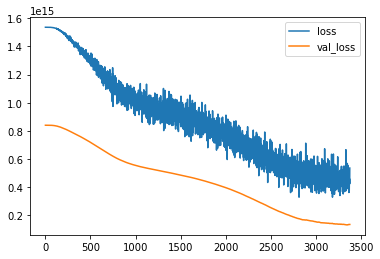

In [54]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [56]:
predictions = model.predict(X_test)

In [57]:
predictions

array([[1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.5952387e+08],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.5952387e+08],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.2032684e+03],
       [1.203268

In [58]:
np.sqrt(mean_squared_error(y_test,predictions))

11587535.673617417

In [59]:
mean_absolute_error(y_test,predictions)

1609408.3470425587

In [60]:
X['RESERVE_AMT'].describe()

count    3.318000e+03
mean     5.790849e+06
std      3.597099e+07
min      5.800000e-02
25%      2.150000e+00
50%      3.902700e+01
75%      3.814600e+04
max      2.360000e+08
Name: RESERVE_AMT, dtype: float64

In [61]:
1610640/5784258.0

0.27845230969987855

In [62]:
# Best possible score is 1.0, lower values are worse.
explained_variance_score(y_test,predictions)

0.8387038742044047

In [63]:
#model.save('Saved Models/calculate-mineral.h5')

## LOADING THE SAVED MODEL

In [64]:
from keras.models import load_model
model_final = load_model('Saved Models/calculate-mineral.h5')

In [65]:
inputs = X_test[10]

In [66]:
inputs

array([0.26415094, 0.7885906 , 0.90909091, 0.04761905, 0.56097561,
       0.67460317, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [67]:
inputs.shape

(23,)

In [68]:
inputs=inputs.reshape(1,-1)

In [69]:
prediction = model_final.predict(inputs)

In [70]:
print(prediction)

[[29.248446]]
